# Projet immo IA / partie EDA

# Import librairie

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Import fichier

In [5]:
df = pd.read_csv("data/train_data.csv")
df = df.rename(columns =  {"Unnamed: 0" : "id"})
df

id  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

# 1ère itération

## Visualisation

On tente de visualiser toute nos variables les unes par rapport aux autres pour en tirer des informations si possible

Ici on peux voir des corrélation positive entre total_bedrooms, total_rooms, population, median_income,lattitude et longitude

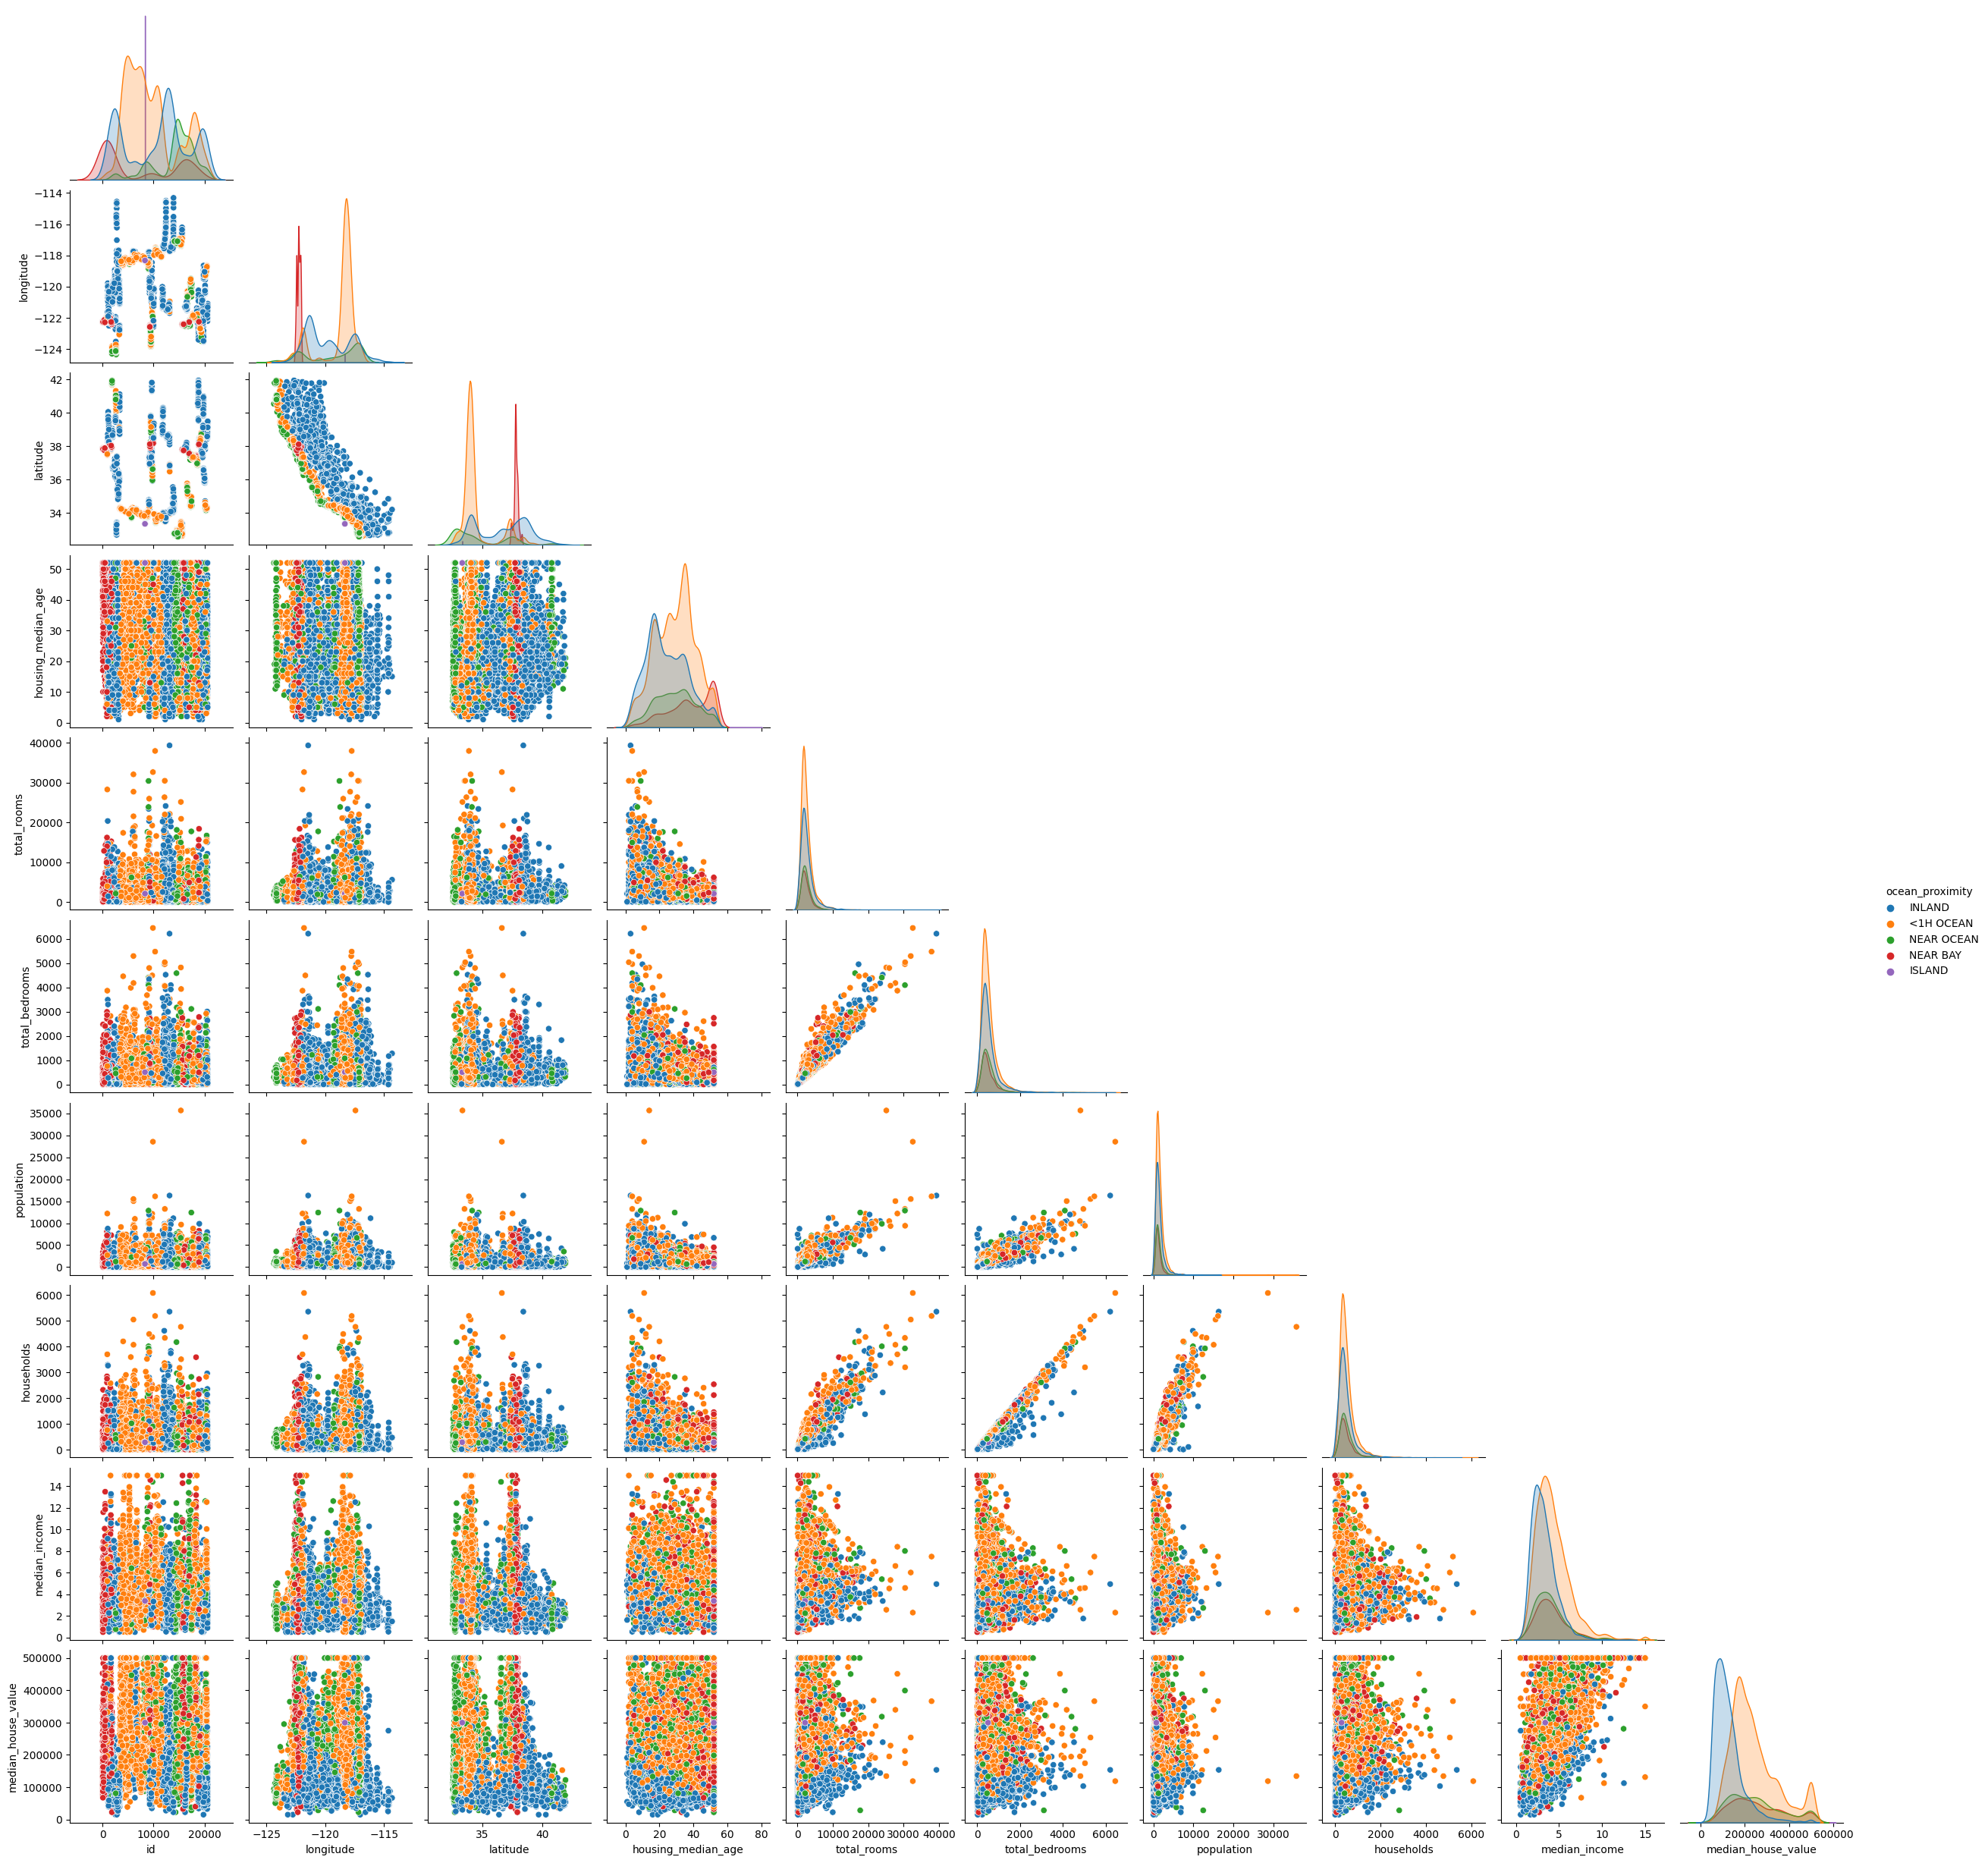

In [6]:
sns.pairplot(df, corner = True, hue = "ocean_proximity")
plt.show()

Ici on peut voir la répartition du prix des maisons en fonction de leur proximité avec l'ocean. On remarque très clairement que les maisons les plus chers se situe en bord d'océan

In [7]:
fig = px.scatter_mapbox(df, lat="latitude", 
lon="longitude",color="median_house_value", mapbox_style= "open-street-map",zoom = 4.5)
fig.update_layout(
    showlegend=False,
    font={'size': 15},
    title={'text': '<b>Median</b>', 'font': {'size': 20}}, 
    title_x = 0.45
)

fig.show()

Sans surprise les ménage les plus pauvre sont éloigné de l'ocean où les maisons coutent le plus cher. 
Ce qui nous donne une indication sur la corélation entre ces trois variables

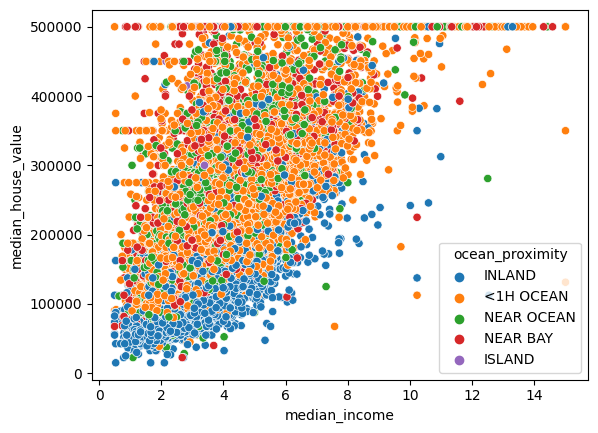

In [8]:
sns.scatterplot(data = df, x= "median_income", y = "median_house_value", hue = "ocean_proximity")
plt.show()

## Duplicates

On vérifie que chaque id sois unique, si tel est le cas comme ici, on supprime la colonne pour tester si nous n'avons pas un bloc qui aurait été crée en double 

In [9]:
df["id"].unique

<bound method Series.unique of 0         2072
1        10600
2         2494
3         4284
4        16541
         ...  
16507     1099
16508    18898
16509    11798
16510     6637
16511     2575
Name: id, Length: 16512, dtype: int64>

In [10]:
df.drop(columns = "id").drop_duplicates()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.84     36.77                 6.0       1853.0           473.0   
1        -117.80     33.68                 8.0       2032.0           349.0   
2        -120.19     36.60                25.0        875.0           214.0   
3        -118.32     34.10                31.0        622.0           229.0   
4        -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
16507    -121.90     39.59                20.0       1465.0           278.0   
16508    -122.25     38.11                49.0       2365.0           504.0   
16509    -121.22     38.92                19.0       2531.0           461.0   
16510    -118.14     34.16                39.0       2776.0           840.0   
16511    -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  \
0          1397.0       417.0         1.4817             72000.0   
1           862.0       340.0         6.9133            274100.0   
2           931.0       214.0         1.5536             58300.0   
3           597.0       227.0         1.5284            200000.0   
4          1130.0       372.0         4.0815            117900.0   
...           ...         ...            ...                 ...   
16507       745.0       250.0         3.0625             93800.0   
16508      1131.0       458.0         2.6133            103100.0   
16509      1206.0       429.0         4.4958            192600.0   
16510      2546.0       773.0         2.5750            153500.0   
16511      1259.0       420.0         2.2478             81100.0   

      ocean_proximity  
0              INLAND  
1           <1H OCEAN  
2              INLAND  
3           <1H OCEAN  
4              INLAND  
...               ...  
16507          INLAND  
16508        NEAR BAY  
16509          INLAND  
16510       <1H OCEAN  
16511      NEAR OCEAN  

[16512 rows x 10 columns]

## Missing data

On va vérifier le nombre de valeurs manquantes dans notre dataset en regardant les NAN value ou bien les valeurs qui serait à 0

Ici nous avons 176 NaN value sur total_bedrooms et toute nos données sur le reste

In [11]:
df.isnull().sum()

id                      0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Ensuite on vérifie le nombre de 0 présent dans le dataset
ici on à juste l'id à 0 

In [12]:
zero = (df==0).any().sum(axis = 0)
print("Number of zero :", zero)
df.loc[df["id"]==0]

Number of zero : 1


id  longitude  latitude  housing_median_age  total_rooms  \
4569   0    -122.23     37.88                41.0        880.0   

      total_bedrooms  population  households  median_income  \
4569           129.0       322.0       126.0         8.3252   

      median_house_value ocean_proximity  
4569            452600.0        NEAR BAY

In [13]:
df.loc[df["total_bedrooms"].isna()]

id  longitude  latitude  housing_median_age  total_rooms  \
33      5723    -118.23     34.18                45.0       2332.0   
171     2578    -124.06     40.86                34.0       4183.0   
178    10033    -121.08     39.22                30.0       2188.0   
179    19485    -120.98     37.66                10.0        934.0   
259    19766    -122.10     40.03                25.0       2516.0   
...      ...        ...       ...                 ...          ...   
16002  17202    -119.73     34.44                38.0       1729.0   
16089  17041    -122.28     37.51                33.0       4719.0   
16214   4591    -118.28     34.06                42.0       2472.0   
16228   9942    -122.23     38.17                45.0        350.0   
16323   2301    -119.78     36.82                25.0       5016.0   

       total_bedrooms  population  households  median_income  \
33                NaN       943.0       339.0         8.1132   
171               NaN      1891.0       669.0         3.2216   
178               NaN      1033.0       437.0         2.1419   
179               NaN       401.0       255.0         0.9336   
259               NaN      1266.0       494.0         1.7566   
...               ...         ...         ...            ...   
16002             NaN       801.0       395.0         3.1364   
16089             NaN      1980.0       757.0         6.1064   
16214             NaN      3795.0      1179.0         1.2254   
16228             NaN       225.0        72.0         1.8942   
16323             NaN      2133.0       928.0         3.6250   

       median_house_value ocean_proximity  
33               446600.0       <1H OCEAN  
171               98100.0      NEAR OCEAN  
178              105200.0          INLAND  
179              127100.0          INLAND  
259               58400.0          INLAND  
...                   ...             ...  
16002            357500.0      NEAR OCEAN  
16089            405000.0      NEAR OCEAN  
16214            162500.0       <1H OCEAN  
16228            216700.0        NEAR BAY  
16323             89500.0          INLAND  

[176 rows x 11 columns]

## Outliers

Nous recherchons les Outliers pour peut être identifier ce qui sont et ensuite les supprimé.
Notre modèle de ML peut être fortement biaisé par les outliers donc nous les supprimeront

Initialement en l'état on ne peux pas regarder les outliers en ayant tout les boxplot sur un graphique.
Pour palier à ce problème nous allons utiliser MinMaxScaler de scikit learn pour standardiser nos point entre 0 et 1

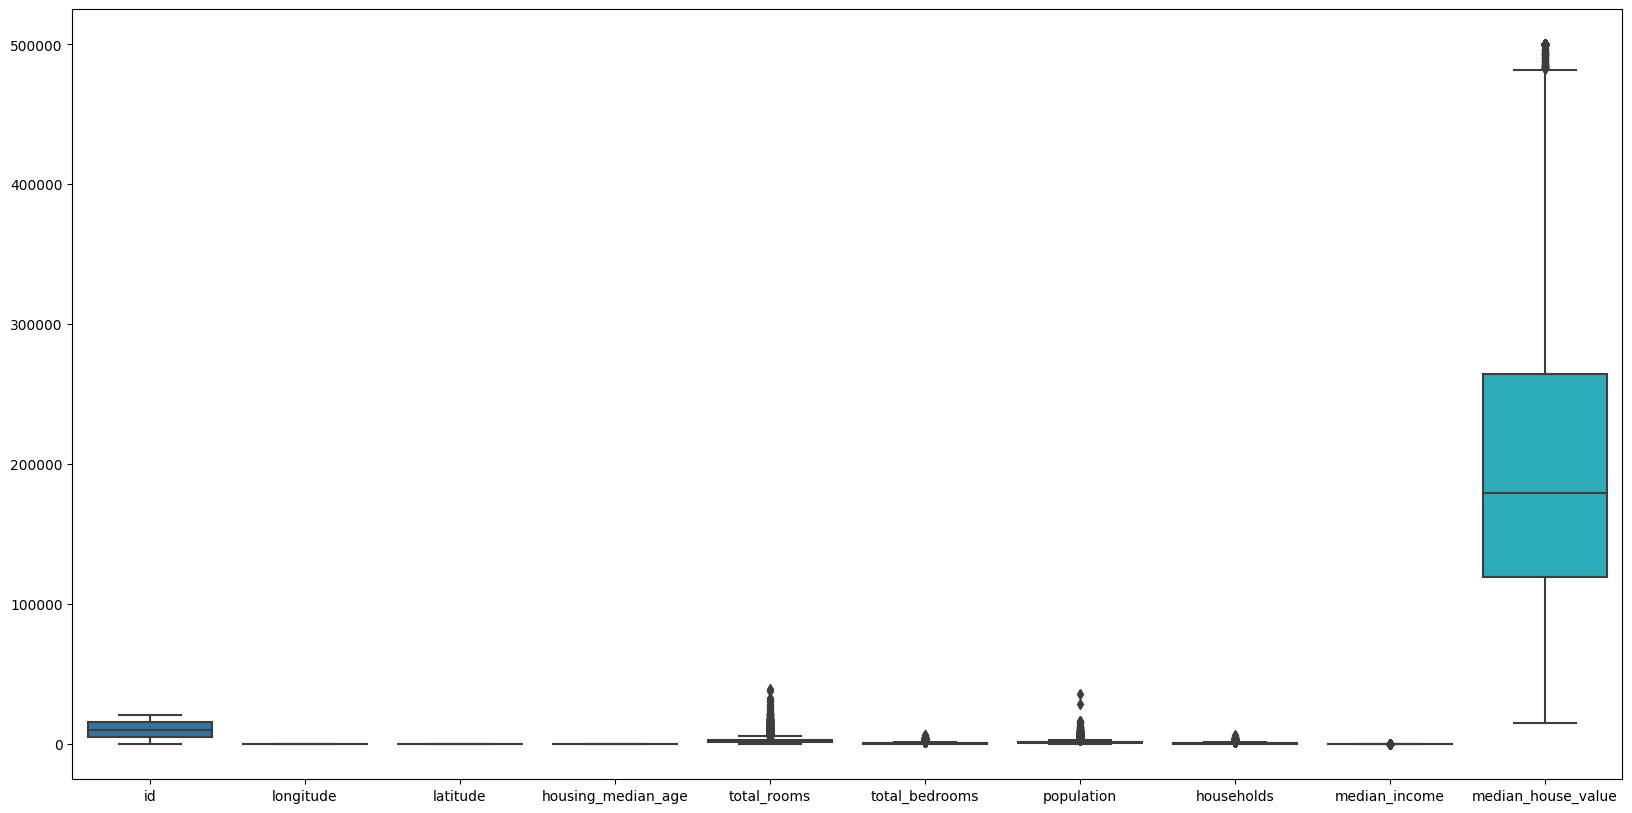

In [14]:
plt.subplots(figsize = (20,10))
sns.boxplot(data = df)
plt.show()

Comme on peux le voir, en ayant nos features entre 0 et 1 le graphique est bien plus clair

In [15]:
from sklearn.preprocessing import MinMaxScaler

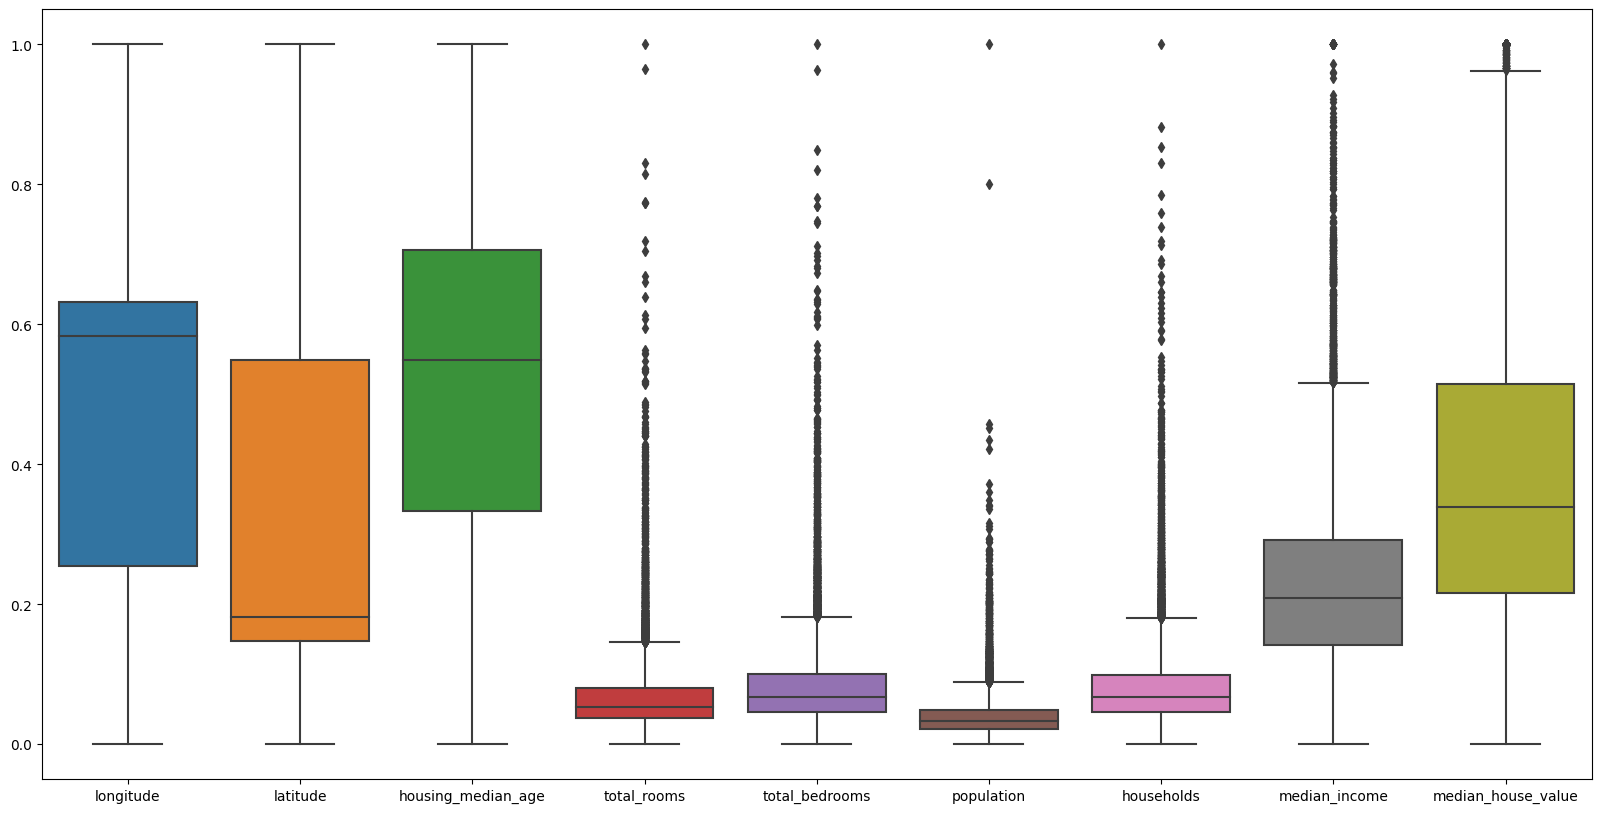

In [16]:
df_numerique = df.copy().drop(columns = ["ocean_proximity","id"])
scaler = MinMaxScaler()
arr_scale = scaler.fit_transform(df_numerique)
df_scale = pd.DataFrame(arr_scale, columns = df_numerique.columns)
plt.subplots(figsize = (20,10))
sns.boxplot(data = df_scale)
plt.show()

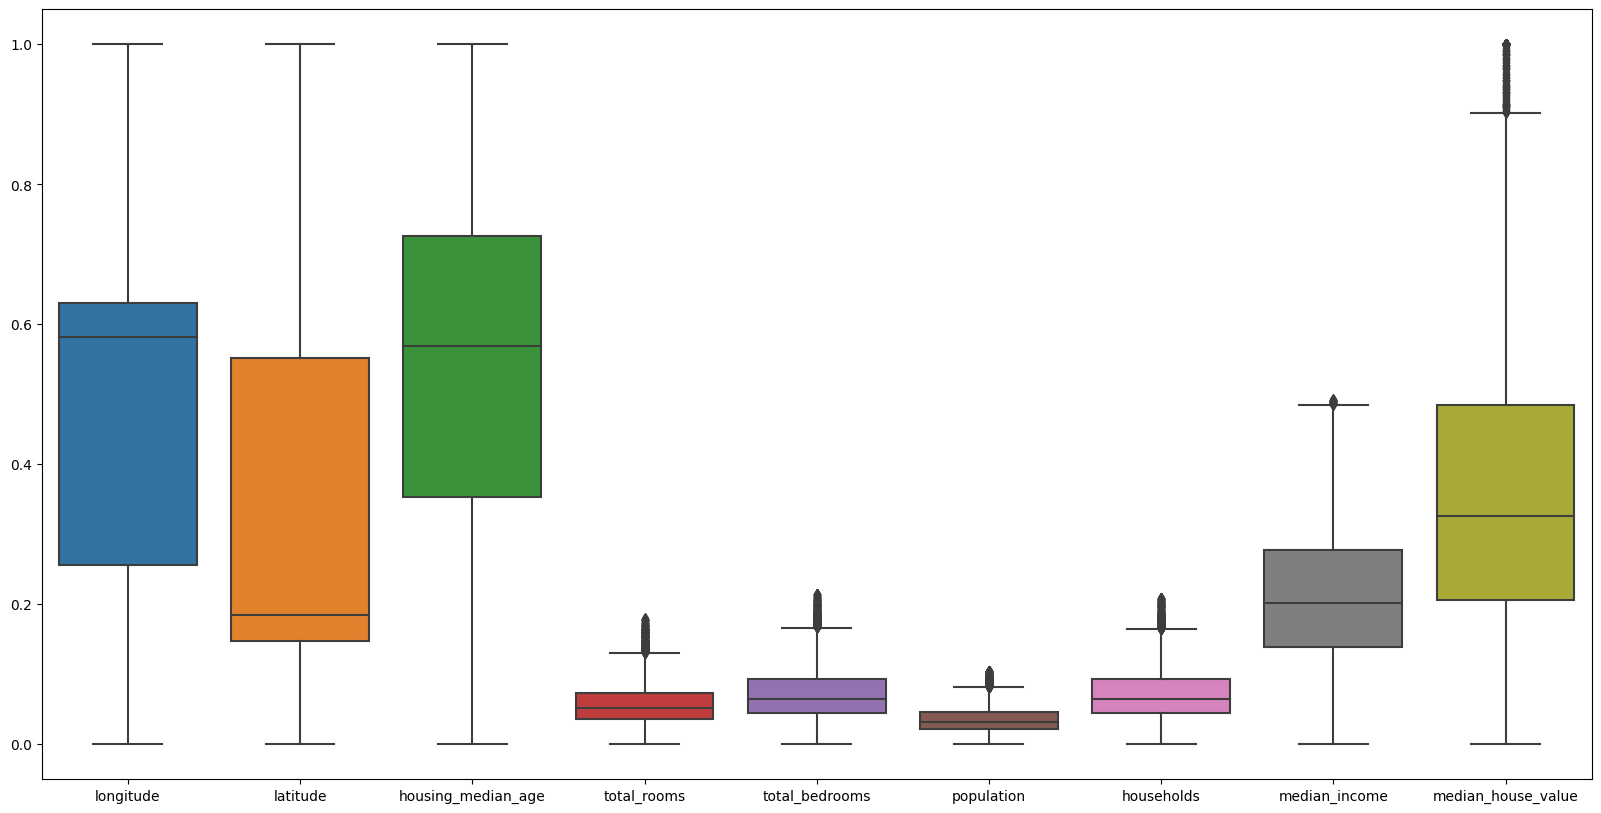

In [17]:
df_scale = df_scale.fillna(0)
df_without_outliers = df_scale[(np.abs(stats.zscore(df_scale["total_rooms"])) < 2)& 
         (np.abs(stats.zscore(df_scale["total_bedrooms"])) < 2) & 
         (np.abs(stats.zscore(df_scale["population"])) < 2) &
         (np.abs(stats.zscore(df_scale["households"])) < 2) &  
         (np.abs(stats.zscore(df_scale["median_income"])) < 2) &
         (np.abs(stats.zscore(df_scale["median_income"])) < 2)]
plt.subplots(figsize = (20,10))
sns.boxplot(data = df_without_outliers)
plt.show()

In [18]:
Pour supprimez les outliers on utilise le zscore, et on prendra toute les valeurs ayant un zscore inférieur à 2.
2 étant la limite qui représente 95% de nos données.
Si on plaçait cette limite à 3 on aurait 99.7% de nos données, ce qui ne serait pas suffisant pour supprimez assez d'outlier

SyntaxError: invalid syntax (3543897465.py, line 1)